In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10

In [94]:
gdp = pd.read_csv("data/gdp.csv")
gdp["gdp"] = gdp["GDP (constant 2010 US$)"] / 1_000_000_000

In [95]:
import plotly.express as px
px.line(gdp, x = "Year", y = "gdp", color = "Entity")

In [96]:
pop = pd.read_csv("data/population.csv")

In [97]:
pop

Entity Code  Year  Total population (Gapminder, HYDE & UN)
0      Afghanistan  AFG  1800                                  3280000
1      Afghanistan  AFG  1801                                  3280000
2      Afghanistan  AFG  1802                                  3280000
3      Afghanistan  AFG  1803                                  3280000
4      Afghanistan  AFG  1804                                  3280000
...            ...  ...   ...                                      ...
46878     Zimbabwe  ZWE  2015                                 13815000
46879     Zimbabwe  ZWE  2016                                 14030000
46880     Zimbabwe  ZWE  2017                                 14237000
46881     Zimbabwe  ZWE  2018                                 14439000
46882     Zimbabwe  ZWE  2019                                 14645000

[46883 rows x 4 columns]

In [98]:
px.line(pop.query("Year > 1900"), x = "Year", y = "Total population (Gapminder, HYDE & UN)", color = "Entity")



In [99]:
pop = pop.rename(columns = {"Total population (Gapminder, HYDE & UN)" : "population"})

In [100]:
pop

Entity Code  Year  population
0      Afghanistan  AFG  1800     3280000
1      Afghanistan  AFG  1801     3280000
2      Afghanistan  AFG  1802     3280000
3      Afghanistan  AFG  1803     3280000
4      Afghanistan  AFG  1804     3280000
...            ...  ...   ...         ...
46878     Zimbabwe  ZWE  2015    13815000
46879     Zimbabwe  ZWE  2016    14030000
46880     Zimbabwe  ZWE  2017    14237000
46881     Zimbabwe  ZWE  2018    14439000
46882     Zimbabwe  ZWE  2019    14645000

[46883 rows x 4 columns]

In [101]:
gdp2017 = gdp.query("Year == 2017")
gdp2017

Entity Code  Year  GDP (constant 2010 US$)         gdp
15    Afghanistan  AFG  2017             2.196941e+10   21.969414
53        Albania  ALB  2017             1.398856e+10   13.988556
111       Algeria  DZA  2017             1.993674e+11  199.367414
174       Andorra  AND  2017             3.382068e+09    3.382068
212        Angola  AGO  2017             1.037860e+11  103.785984
...           ...  ...   ...                      ...         ...
8597   Uzbekistan  UZB  2017             6.577995e+10   65.779950
8636      Vanuatu  VUT  2017             8.120250e+08    0.812025
8725      Vietnam  VNM  2017             1.752841e+11  175.284081
8810       Zambia  ZMB  2017             2.813940e+10   28.139397
8868     Zimbabwe  ZWE  2017             1.532981e+10   15.329811

[185 rows x 5 columns]

In [102]:
pop2017 = pop.query("Year == 2017")
pop2017

Entity      Code  Year  population
217       Afghanistan       AFG  2017    36296000
339            Africa       NaN  2017  1244221952
559           Albania       ALB  2017     2884000
779           Algeria       DZA  2017    41389000
849    American Samoa       ASM  2017       56000
...               ...       ...   ...         ...
46069  Western Sahara       ESH  2017      553000
46220           World  OWID_WRL  2017  7547858944
46440           Yemen       YEM  2017    27835000
46660          Zambia       ZMB  2017    16854000
46880        Zimbabwe       ZWE  2017    14237000

[242 rows x 4 columns]

In [103]:
gdp_and_pop_2017 = pd.merge(left = gdp2017, right = pop2017, left_on = "Entity", right_on = "Entity", how = "outer")
gdp_and_pop_2017

Entity Code_x  Year_x  GDP (constant 2010 US$)         gdp  \
0          Afghanistan    AFG  2017.0             2.196941e+10   21.969414   
1              Albania    ALB  2017.0             1.398856e+10   13.988556   
2              Algeria    DZA  2017.0             1.993674e+11  199.367414   
3              Andorra    AND  2017.0             3.382068e+09    3.382068   
4               Angola    AGO  2017.0             1.037860e+11  103.785984   
..                 ...    ...     ...                      ...         ...   
238          Venezuela    NaN     NaN                      NaN         NaN   
239  Wallis and Futuna    NaN     NaN                      NaN         NaN   
240     Western Sahara    NaN     NaN                      NaN         NaN   
241              World    NaN     NaN                      NaN         NaN   
242              Yemen    NaN     NaN                      NaN         NaN   

       Code_y  Year_y    population  
0         AFG  2017.0  3.629600e+07  
1         ALB  2017.0  2.884000e+06  
2         DZA  2017.0  4.138900e+07  
3         AND  2017.0  7.700000e+04  
4         AGO  2017.0  2.981700e+07  
..        ...     ...           ...  
238       VEN  2017.0  2.940200e+07  
239       WLF  2017.0  1.200000e+04  
240       ESH  2017.0  5.530000e+05  
241  OWID_WRL  2017.0  7.547859e+09  
242       YEM  2017.0  2.783500e+07  

[243 rows x 8 columns]

In [104]:
gdp_and_pop_2017["gdp_per_capita"] = gdp_and_pop_2017["GDP (constant 2010 US$)"] / gdp_and_pop_2017["population"]
gdp_and_pop_2017.sort_values('gdp_per_capita')
gdp_and_pop_2017

Entity Code_x  Year_x  GDP (constant 2010 US$)         gdp  \
0          Afghanistan    AFG  2017.0             2.196941e+10   21.969414   
1              Albania    ALB  2017.0             1.398856e+10   13.988556   
2              Algeria    DZA  2017.0             1.993674e+11  199.367414   
3              Andorra    AND  2017.0             3.382068e+09    3.382068   
4               Angola    AGO  2017.0             1.037860e+11  103.785984   
..                 ...    ...     ...                      ...         ...   
238          Venezuela    NaN     NaN                      NaN         NaN   
239  Wallis and Futuna    NaN     NaN                      NaN         NaN   
240     Western Sahara    NaN     NaN                      NaN         NaN   
241              World    NaN     NaN                      NaN         NaN   
242              Yemen    NaN     NaN                      NaN         NaN   

       Code_y  Year_y    population  gdp_per_capita  
0         AFG  2017.0  3.629600e+07      605.284718  
1         ALB  2017.0  2.884000e+06     4850.400743  
2         DZA  2017.0  4.138900e+07     4816.917876  
3         AND  2017.0  7.700000e+04    43922.964124  
4         AGO  2017.0  2.981700e+07     3480.765485  
..        ...     ...           ...             ...  
238       VEN  2017.0  2.940200e+07             NaN  
239       WLF  2017.0  1.200000e+04             NaN  
240       ESH  2017.0  5.530000e+05             NaN  
241  OWID_WRL  2017.0  7.547859e+09             NaN  
242       YEM  2017.0  2.783500e+07             NaN  

[243 rows x 9 columns]

In [105]:
px.bar(gdp_and_pop_2017.sort_values("gdp_per_capita"), x = "Entity", y = "gdp_per_capita")

In [106]:
gdp_and_pop_2017.query('Entity == "Kosovo"')

Entity    Code_x  Year_x  GDP (constant 2010 US$)       gdp Code_y  \
87  Kosovo  OWID_KOS  2017.0             7.447672e+09  7.447672    NaN   

    Year_y  population  gdp_per_capita  
87     NaN         NaN             NaN

In [107]:
set(gdp2017["Entity"]) - set(pop2017["Entity"])

{'Kosovo'}

In [108]:
gdp_and_pop_2017

Entity Code_x  Year_x  GDP (constant 2010 US$)         gdp  \
0          Afghanistan    AFG  2017.0             2.196941e+10   21.969414   
1              Albania    ALB  2017.0             1.398856e+10   13.988556   
2              Algeria    DZA  2017.0             1.993674e+11  199.367414   
3              Andorra    AND  2017.0             3.382068e+09    3.382068   
4               Angola    AGO  2017.0             1.037860e+11  103.785984   
..                 ...    ...     ...                      ...         ...   
238          Venezuela    NaN     NaN                      NaN         NaN   
239  Wallis and Futuna    NaN     NaN                      NaN         NaN   
240     Western Sahara    NaN     NaN                      NaN         NaN   
241              World    NaN     NaN                      NaN         NaN   
242              Yemen    NaN     NaN                      NaN         NaN   

       Code_y  Year_y    population  gdp_per_capita  
0         AFG  2017.0  3.629600e+07      605.284718  
1         ALB  2017.0  2.884000e+06     4850.400743  
2         DZA  2017.0  4.138900e+07     4816.917876  
3         AND  2017.0  7.700000e+04    43922.964124  
4         AGO  2017.0  2.981700e+07     3480.765485  
..        ...     ...           ...             ...  
238       VEN  2017.0  2.940200e+07             NaN  
239       WLF  2017.0  1.200000e+04             NaN  
240       ESH  2017.0  5.530000e+05             NaN  
241  OWID_WRL  2017.0  7.547859e+09             NaN  
242       YEM  2017.0  2.783500e+07             NaN  

[243 rows x 9 columns]

In [109]:
gdp_and_pop_2017.sort_values("gdp_per_capita")

Entity Code_x  Year_x  GDP (constant 2010 US$)  \
27                        Burundi    BDI  2017.0             2.309167e+09   
32       Central African Republic    CAF  2017.0             1.560913e+09   
94                        Liberia    LBR  2017.0             1.666984e+09   
121                         Niger    NER  2017.0             8.503683e+09   
44   Democratic Republic of Congo    COD  2017.0             3.327760e+10   
..                            ...    ...     ...                      ...   
238                     Venezuela    NaN     NaN                      NaN   
239             Wallis and Futuna    NaN     NaN                      NaN   
240                Western Sahara    NaN     NaN                      NaN   
241                         World    NaN     NaN                      NaN   
242                         Yemen    NaN     NaN                      NaN   

           gdp    Code_y  Year_y    population  gdp_per_capita  
27    2.309167       BDI  2017.0  1.082700e+07      213.278588  
32    1.560913       CAF  2017.0  4.596000e+06      339.624311  
94    1.666984       LBR  2017.0  4.702000e+06      354.526588  
121   8.503683       NER  2017.0  2.160200e+07      393.652575  
44   33.277602       COD  2017.0  8.139900e+07      408.820771  
..         ...       ...     ...           ...             ...  
238        NaN       VEN  2017.0  2.940200e+07             NaN  
239        NaN       WLF  2017.0  1.200000e+04             NaN  
240        NaN       ESH  2017.0  5.530000e+05             NaN  
241        NaN  OWID_WRL  2017.0  7.547859e+09             NaN  
242        NaN       YEM  2017.0  2.783500e+07             NaN  

[243 rows x 9 columns]

In [110]:
pop

Entity Code  Year  population
0      Afghanistan  AFG  1800     3280000
1      Afghanistan  AFG  1801     3280000
2      Afghanistan  AFG  1802     3280000
3      Afghanistan  AFG  1803     3280000
4      Afghanistan  AFG  1804     3280000
...            ...  ...   ...         ...
46878     Zimbabwe  ZWE  2015    13815000
46879     Zimbabwe  ZWE  2016    14030000
46880     Zimbabwe  ZWE  2017    14237000
46881     Zimbabwe  ZWE  2018    14439000
46882     Zimbabwe  ZWE  2019    14645000

[46883 rows x 4 columns]

In [111]:
gdp

Entity Code  Year  GDP (constant 2010 US$)        gdp
0     Afghanistan  AFG  2002             8.013233e+09   8.013233
1     Afghanistan  AFG  2003             8.689884e+09   8.689884
2     Afghanistan  AFG  2004             8.781610e+09   8.781610
3     Afghanistan  AFG  2005             9.762979e+09   9.762979
4     Afghanistan  AFG  2006             1.030523e+10  10.305228
...           ...  ...   ...                      ...        ...
8864     Zimbabwe  ZWE  2013             1.418193e+10  14.181927
8865     Zimbabwe  ZWE  2014             1.448359e+10  14.483588
8866     Zimbabwe  ZWE  2015             1.472830e+10  14.728302
8867     Zimbabwe  ZWE  2016             1.481899e+10  14.818986
8868     Zimbabwe  ZWE  2017             1.532981e+10  15.329811

[8869 rows x 5 columns]

In [112]:
gdp_and_pop = pd.merge(left = gdp, right = pop, left_on = ["Entity", "Year"], right_on = ["Entity", "Year"], how = "left")
gdp_and_pop

Entity Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
0     Afghanistan    AFG  2002             8.013233e+09   8.013233    AFG   
1     Afghanistan    AFG  2003             8.689884e+09   8.689884    AFG   
2     Afghanistan    AFG  2004             8.781610e+09   8.781610    AFG   
3     Afghanistan    AFG  2005             9.762979e+09   9.762979    AFG   
4     Afghanistan    AFG  2006             1.030523e+10  10.305228    AFG   
...           ...    ...   ...                      ...        ...    ...   
8864     Zimbabwe    ZWE  2013             1.418193e+10  14.181927    ZWE   
8865     Zimbabwe    ZWE  2014             1.448359e+10  14.483588    ZWE   
8866     Zimbabwe    ZWE  2015             1.472830e+10  14.728302    ZWE   
8867     Zimbabwe    ZWE  2016             1.481899e+10  14.818986    ZWE   
8868     Zimbabwe    ZWE  2017             1.532981e+10  15.329811    ZWE   

      population  
0     22601000.0  
1     23681000.0  
2     24727000.0  
3     25654000.0  
4     26433000.0  
...          ...  
8864  13350000.0  
8865  13587000.0  
8866  13815000.0  
8867  14030000.0  
8868  14237000.0  

[8869 rows x 7 columns]

In [113]:
gdp_and_pop["gdp_per_capita"] = gdp_and_pop["GDP (constant 2010 US$)"] / gdp_and_pop["population"]

In [114]:
gdp_and_pop

Entity Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
0     Afghanistan    AFG  2002             8.013233e+09   8.013233    AFG   
1     Afghanistan    AFG  2003             8.689884e+09   8.689884    AFG   
2     Afghanistan    AFG  2004             8.781610e+09   8.781610    AFG   
3     Afghanistan    AFG  2005             9.762979e+09   9.762979    AFG   
4     Afghanistan    AFG  2006             1.030523e+10  10.305228    AFG   
...           ...    ...   ...                      ...        ...    ...   
8864     Zimbabwe    ZWE  2013             1.418193e+10  14.181927    ZWE   
8865     Zimbabwe    ZWE  2014             1.448359e+10  14.483588    ZWE   
8866     Zimbabwe    ZWE  2015             1.472830e+10  14.728302    ZWE   
8867     Zimbabwe    ZWE  2016             1.481899e+10  14.818986    ZWE   
8868     Zimbabwe    ZWE  2017             1.532981e+10  15.329811    ZWE   

      population  gdp_per_capita  
0     22601000.0      354.552149  
1     23681000.0      366.955940  
2     24727000.0      355.142564  
3     25654000.0      380.563610  
4     26433000.0      389.862222  
...          ...             ...  
8864  13350000.0     1062.316603  
8865  13587000.0     1065.988675  
8866  13815000.0     1066.109450  
8867  14030000.0     1056.235654  
8868  14237000.0     1076.758501  

[8869 rows x 8 columns]

In [115]:
px.line(gdp_and_pop, x = "Year", y = "gdp_per_capita", color = "Entity")

In [116]:
gdp_and_pop_by_entity = gdp_and_pop.set_index("Entity")
gdp_and_pop_by_entity

Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
Entity                                                                
Afghanistan    AFG  2002             8.013233e+09   8.013233    AFG   
Afghanistan    AFG  2003             8.689884e+09   8.689884    AFG   
Afghanistan    AFG  2004             8.781610e+09   8.781610    AFG   
Afghanistan    AFG  2005             9.762979e+09   9.762979    AFG   
Afghanistan    AFG  2006             1.030523e+10  10.305228    AFG   
...            ...   ...                      ...        ...    ...   
Zimbabwe       ZWE  2013             1.418193e+10  14.181927    ZWE   
Zimbabwe       ZWE  2014             1.448359e+10  14.483588    ZWE   
Zimbabwe       ZWE  2015             1.472830e+10  14.728302    ZWE   
Zimbabwe       ZWE  2016             1.481899e+10  14.818986    ZWE   
Zimbabwe       ZWE  2017             1.532981e+10  15.329811    ZWE   

             population  gdp_per_capita  
Entity                                   
Afghanistan  22601000.0      354.552149  
Afghanistan  23681000.0      366.955940  
Afghanistan  24727000.0      355.142564  
Afghanistan  25654000.0      380.563610  
Afghanistan  26433000.0      389.862222  
...                 ...             ...  
Zimbabwe     13350000.0     1062.316603  
Zimbabwe     13587000.0     1065.988675  
Zimbabwe     13815000.0     1066.109450  
Zimbabwe     14030000.0     1056.235654  
Zimbabwe     14237000.0     1076.758501  

[8869 rows x 7 columns]

In [117]:
gdp_per_capita_1960 = gdp_and_pop_by_entity.query("Year == 1960")[['gdp_per_capita']]
gdp_per_capita_1960

gdp_per_capita
Entity                       
Algeria           2480.954892
Argentina         5642.704253
Australia        19452.581069
Austria          12987.795692
Bahamas          17659.437251
...                       ...
United States    16484.868935
Uruguay           5473.869009
Venezuela        12456.963693
Zambia            1495.596123
Zimbabwe           890.482345

[90 rows x 1 columns]

In [118]:
gdp_and_pop_by_entity["gdp_per_cap_ratio"] = gdp_and_pop_by_entity["gdp_per_capita"] / gdp_per_capita_1960["gdp_per_capita"]

In [119]:
gdp_and_pop_by_entity

Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
Entity                                                                
Afghanistan    AFG  2002             8.013233e+09   8.013233    AFG   
Afghanistan    AFG  2003             8.689884e+09   8.689884    AFG   
Afghanistan    AFG  2004             8.781610e+09   8.781610    AFG   
Afghanistan    AFG  2005             9.762979e+09   9.762979    AFG   
Afghanistan    AFG  2006             1.030523e+10  10.305228    AFG   
...            ...   ...                      ...        ...    ...   
Zimbabwe       ZWE  2013             1.418193e+10  14.181927    ZWE   
Zimbabwe       ZWE  2014             1.448359e+10  14.483588    ZWE   
Zimbabwe       ZWE  2015             1.472830e+10  14.728302    ZWE   
Zimbabwe       ZWE  2016             1.481899e+10  14.818986    ZWE   
Zimbabwe       ZWE  2017             1.532981e+10  15.329811    ZWE   

             population  gdp_per_capita  gdp_per_cap_ratio  
Entity                                                      
Afghanistan  22601000.0      354.552149                NaN  
Afghanistan  23681000.0      366.955940                NaN  
Afghanistan  24727000.0      355.142564                NaN  
Afghanistan  25654000.0      380.563610                NaN  
Afghanistan  26433000.0      389.862222                NaN  
...                 ...             ...                ...  
Zimbabwe     13350000.0     1062.316603           1.192968  
Zimbabwe     13587000.0     1065.988675           1.197091  
Zimbabwe     13815000.0     1066.109450           1.197227  
Zimbabwe     14030000.0     1056.235654           1.186139  
Zimbabwe     14237000.0     1076.758501           1.209186  

[8869 rows x 8 columns]

In [120]:
gdp_and_pop = gdp_and_pop_by_entity.reset_index()
gdp_and_pop

Entity Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
0     Afghanistan    AFG  2002             8.013233e+09   8.013233    AFG   
1     Afghanistan    AFG  2003             8.689884e+09   8.689884    AFG   
2     Afghanistan    AFG  2004             8.781610e+09   8.781610    AFG   
3     Afghanistan    AFG  2005             9.762979e+09   9.762979    AFG   
4     Afghanistan    AFG  2006             1.030523e+10  10.305228    AFG   
...           ...    ...   ...                      ...        ...    ...   
8864     Zimbabwe    ZWE  2013             1.418193e+10  14.181927    ZWE   
8865     Zimbabwe    ZWE  2014             1.448359e+10  14.483588    ZWE   
8866     Zimbabwe    ZWE  2015             1.472830e+10  14.728302    ZWE   
8867     Zimbabwe    ZWE  2016             1.481899e+10  14.818986    ZWE   
8868     Zimbabwe    ZWE  2017             1.532981e+10  15.329811    ZWE   

      population  gdp_per_capita  gdp_per_cap_ratio  
0     22601000.0      354.552149                NaN  
1     23681000.0      366.955940                NaN  
2     24727000.0      355.142564                NaN  
3     25654000.0      380.563610                NaN  
4     26433000.0      389.862222                NaN  
...          ...             ...                ...  
8864  13350000.0     1062.316603           1.192968  
8865  13587000.0     1065.988675           1.197091  
8866  13815000.0     1066.109450           1.197227  
8867  14030000.0     1056.235654           1.186139  
8868  14237000.0     1076.758501           1.209186  

[8869 rows x 9 columns]

In [121]:
gdp_per_cap_ratio_history = gdp_and_pop.dropna()

In [122]:
px.line(gdp_per_cap_ratio_history, x = "Year", y = "gdp_per_cap_ratio", color = "Entity")

In [123]:
gdp_and_pop_by_entity = gdp_per_cap_ratio_history.set_index("Entity")
gdp_and_pop_by_entity["pop_ratio"] = gdp_and_pop_by_entity["population"] / gdp_and_pop_by_entity.query("Year == 1960")["population"]
gdp_and_pop_by_entity["gdp_ratio"] = gdp_and_pop_by_entity["gdp"] / gdp_and_pop_by_entity.query("Year == 1960")["gdp"]
gdp_and_pop = gdp_and_pop_by_entity.reset_index()

In [124]:
gdp_and_pop

Entity Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
0      Algeria    DZA  1960             2.743440e+10  27.434399    DZA   
1      Algeria    DZA  1961             2.370183e+10  23.701828    DZA   
2      Algeria    DZA  1962             1.903611e+10  19.036113    DZA   
3      Algeria    DZA  1963             2.556811e+10  25.568114    DZA   
4      Algeria    DZA  1964             2.706114e+10  27.061141    DZA   
...        ...    ...   ...                      ...        ...    ...   
5207  Zimbabwe    ZWE  2013             1.418193e+10  14.181927    ZWE   
5208  Zimbabwe    ZWE  2014             1.448359e+10  14.483588    ZWE   
5209  Zimbabwe    ZWE  2015             1.472830e+10  14.728302    ZWE   
5210  Zimbabwe    ZWE  2016             1.481899e+10  14.818986    ZWE   
5211  Zimbabwe    ZWE  2017             1.532981e+10  15.329811    ZWE   

      population  gdp_per_capita  gdp_per_cap_ratio  pop_ratio  gdp_ratio  
0     11058000.0     2480.954892           1.000000   1.000000   1.000000  
1     11336000.0     2090.845811           0.842758   1.025140   0.863946  
2     11620000.0     1638.219736           0.660318   1.050823   0.693878  
3     11913000.0     2146.236350           0.865085   1.077320   0.931973  
4     12222000.0     2214.133643           0.892452   1.105263   0.986395  
...          ...             ...                ...        ...        ...  
5207  13350000.0     1062.316603           1.192968   3.534551   4.216605  
5208  13587000.0     1065.988675           1.197091   3.597299   4.306296  
5209  13815000.0     1066.109450           1.197227   3.657665   4.379055  
5210  14030000.0     1056.235654           1.186139   3.714588   4.406017  
5211  14237000.0     1076.758501           1.209186   3.769394   4.557897  

[5212 rows x 11 columns]

In [125]:
px.line(gdp_and_pop, x = "Year", y = "pop_ratio", color = "Entity")

In [126]:
px.scatter(gdp_and_pop.query("Year == 2017"), x = "gdp_per_cap_ratio", y = "pop_ratio", color = "Entity")

In [127]:
px.scatter(gdp_and_pop.query("Year == 2017"), x = "gdp_per_cap_ratio", y = "pop_ratio", color = "Entity", size = "gdp_ratio")

In [128]:
#Exercise suggestion: 1960 vs 2017 GDP by using merge

### Adding Life Expectancy Data

In [129]:
life_exp = pd.read_csv("data/life_expectancy.csv")
life_exp

Entity Code  Year  Life expectancy
0      Afghanistan  AFG  1950           27.638
1      Afghanistan  AFG  1951           27.878
2      Afghanistan  AFG  1952           28.361
3      Afghanistan  AFG  1953           28.852
4      Afghanistan  AFG  1954           29.350
...            ...  ...   ...              ...
18440     Zimbabwe  ZWE  2015           59.534
18441     Zimbabwe  ZWE  2016           60.294
18442     Zimbabwe  ZWE  2017           60.812
18443     Zimbabwe  ZWE  2018           61.195
18444     Zimbabwe  ZWE  2019           61.490

[18445 rows x 4 columns]

In [130]:
life_exp = life_exp[["Entity", "Year", "Life expectancy"]]

In [131]:
gdp_pop_le = pd.merge(left = gdp_and_pop, right = life_exp, left_on = ["Entity", "Year"], right_on = ["Entity", "Year"], how = "left")

In [132]:
gdp_pop_le

Entity Code_x  Year  GDP (constant 2010 US$)        gdp Code_y  \
0      Algeria    DZA  1960             2.743440e+10  27.434399    DZA   
1      Algeria    DZA  1961             2.370183e+10  23.701828    DZA   
2      Algeria    DZA  1962             1.903611e+10  19.036113    DZA   
3      Algeria    DZA  1963             2.556811e+10  25.568114    DZA   
4      Algeria    DZA  1964             2.706114e+10  27.061141    DZA   
...        ...    ...   ...                      ...        ...    ...   
5207  Zimbabwe    ZWE  2013             1.418193e+10  14.181927    ZWE   
5208  Zimbabwe    ZWE  2014             1.448359e+10  14.483588    ZWE   
5209  Zimbabwe    ZWE  2015             1.472830e+10  14.728302    ZWE   
5210  Zimbabwe    ZWE  2016             1.481899e+10  14.818986    ZWE   
5211  Zimbabwe    ZWE  2017             1.532981e+10  15.329811    ZWE   

      population  gdp_per_capita  gdp_per_cap_ratio  pop_ratio  gdp_ratio  \
0     11058000.0     2480.954892           1.000000   1.000000   1.000000   
1     11336000.0     2090.845811           0.842758   1.025140   0.863946   
2     11620000.0     1638.219736           0.660318   1.050823   0.693878   
3     11913000.0     2146.236350           0.865085   1.077320   0.931973   
4     12222000.0     2214.133643           0.892452   1.105263   0.986395   
...          ...             ...                ...        ...        ...   
5207  13350000.0     1062.316603           1.192968   3.534551   4.216605   
5208  13587000.0     1065.988675           1.197091   3.597299   4.306296   
5209  13815000.0     1066.109450           1.197227   3.657665   4.379055   
5210  14030000.0     1056.235654           1.186139   3.714588   4.406017   
5211  14237000.0     1076.758501           1.209186   3.769394   4.557897   

      Life expectancy  
0              46.141  
1              46.599  
2              47.056  
3              47.509  
4              47.958  
...               ...  
5207           56.897  
5208           58.410  
5209           59.534  
5210           60.294  
5211           60.812  

[5212 rows x 12 columns]

In [133]:
px.scatter(gdp_pop_le.query("Year == 2017"), x = "gdp_per_capita", y = "Life expectancy", color = "Entity")

In [134]:
px.scatter(gdp_pop_le.query("Year == 2017"), x = "gdp_per_capita", y = "Life expectancy", color = "Entity", log_x = True)

In [135]:
gdp_pop_le_with_log_gdp = gdp_pop_le.copy()

In [136]:
import numpy as np
gdp_pop_le_with_log_gdp["log_10_gdp_per_capita"] = np.log10(gdp_pop_le_with_log_gdp["gdp_per_capita"])

In [137]:
fig = px.scatter(gdp_pop_le_with_log_gdp.query("Year == 2017"), x = "log_10_gdp_per_capita", y = "Life expectancy", trendline = "ols")
fig.show()

### Histograms, KDE Plots, Violin Plots, Box Plots

In [138]:
px.histogram(gdp_pop_le.query("Year == 2017")["Life expectancy"])
# maybe show line

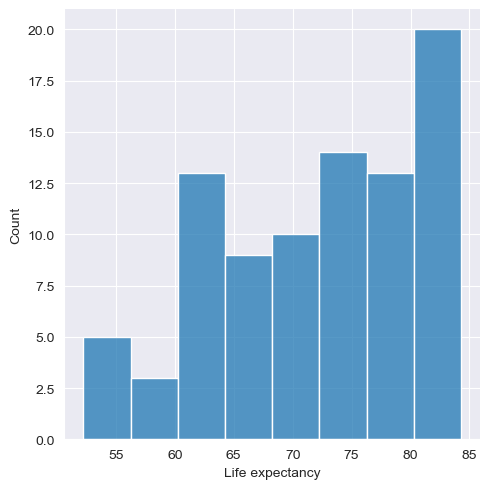

In [139]:
#fig=plt.tight_layout()
sns.displot(gdp_pop_le.query("Year == 2017")["Life expectancy"])
#plt.show()

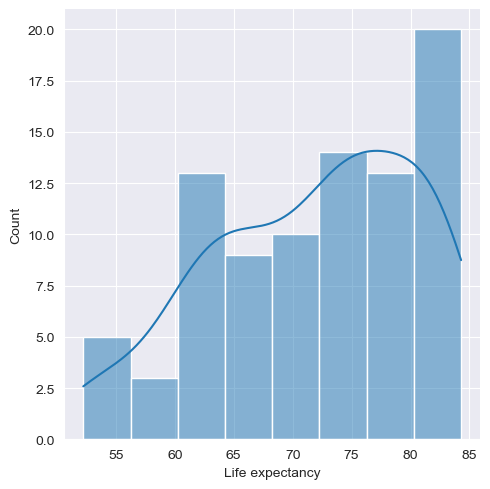

In [140]:
sns.displot(gdp_pop_le.query("Year == 2017")["Life expectancy"], kde = True)

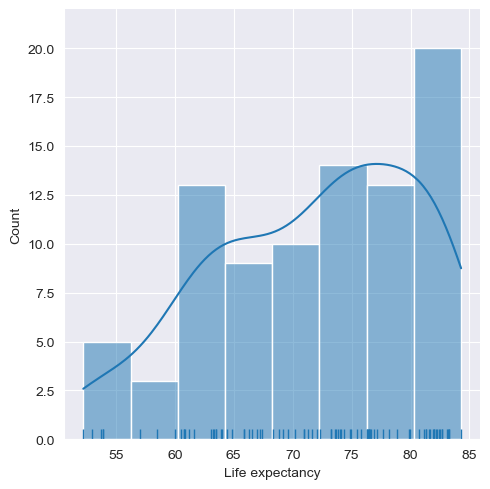

In [141]:
sns.displot(gdp_pop_le.query("Year == 2017")["Life expectancy"], kde = True, rug = True)

In [142]:
px.violin(gdp_pop_le.query("Year == 2017")["Life expectancy"])

In [143]:
px.violin(gdp_pop_le.query("Year == 2017")["Life expectancy"], points = "all")

In [144]:
continents = pd.read_csv("data/continents.csv")
continents

Country      Continent
0         Algeria         Africa
1          Angola         Africa
2           Benin         Africa
3        Botswana         Africa
4    Burkina Faso         Africa
..            ...            ...
197      Paraguay  South America
198          Peru  South America
199      Suriname  South America
200       Uruguay  South America
201     Venezuela  South America

[202 rows x 2 columns]

In [145]:
gdp_pop_le = pd.merge(left = gdp_pop_le, right = continents, left_on = "Entity", right_on = "Country", how = "left")

In [146]:
continents = ["Africa",  "Europe"]
px.violin(gdp_pop_le.query("Year == 2017 and Continent in @continents").dropna(), y = "Life expectancy", color = "Continent")

In [147]:
px.box(gdp_pop_le.query("Year == 2017 and Continent in @continents").dropna(), y = "Life expectancy", color = "Continent")

In [148]:
px.box(gdp_pop_le.query("Year == 2017").dropna(), y = "Life expectancy", color = "Continent")

In [149]:
px.scatter(gdp_pop_le.query("Year == 2017"), x = "gdp_per_capita", y = "Life expectancy", marginal_y = "histogram", marginal_x = "histogram")

In [150]:
px.scatter(gdp_pop_le.query("Year == 2017"), x = "gdp_per_capita", y = "Life expectancy", marginal_y = "box", marginal_x = "box")

In [151]:
px.density_heatmap(gdp_pop_le.query("Year == 2017"), x = "gdp_per_capita", y = "Life expectancy", marginal_x = "histogram", marginal_y = "histogram")

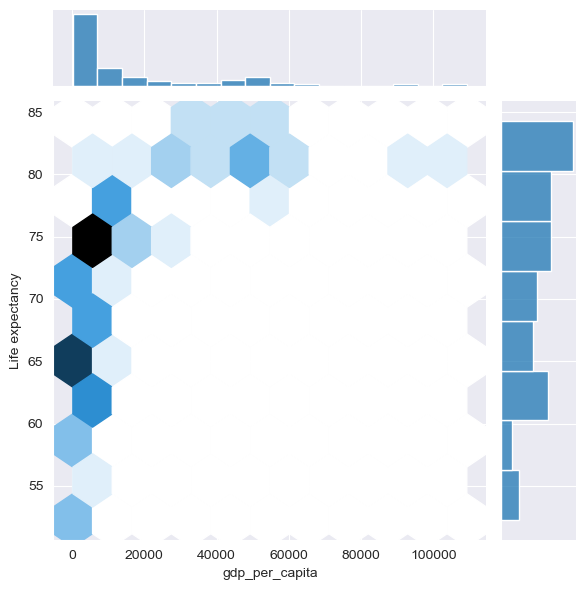

In [152]:
sns.jointplot(data = gdp_pop_le.query("Year == 2017"), x = "gdp_per_capita", y = "Life expectancy", kind = "hex")

### String Data

In [153]:
gdp_pop_le[gdp_pop_le["Entity"].str.contains("in")]

Entity Code_x  Year  GDP (constant 2010 US$)          gdp  \
58         Argentina    ARG  1960             1.155739e+11   115.573869   
59         Argentina    ARG  1961             1.218470e+11   121.847037   
60         Argentina    ARG  1962             1.208089e+11   120.808874   
61         Argentina    ARG  1963             1.143961e+11   114.396101   
62         Argentina    ARG  1964             1.259848e+11   125.984766   
...              ...    ...   ...                      ...          ...   
4978  United Kingdom    GBR  2013             2.564905e+12  2564.904713   
4979  United Kingdom    GBR  2014             2.643243e+12  2643.243341   
4980  United Kingdom    GBR  2015             2.705252e+12  2705.252231   
4981  United Kingdom    GBR  2016             2.757620e+12  2757.620259   
4982  United Kingdom    GBR  2017             2.806903e+12  2806.903097   

     Code_y  population  gdp_per_capita  gdp_per_cap_ratio  pop_ratio  \
58      ARG  20482000.0     5642.704253           1.000000   1.000000   
59      ARG  20817000.0     5853.246697           1.037312   1.016356   
60      ARG  21153000.0     5711.193378           1.012138   1.032760   
61      ARG  21489000.0     5323.472508           0.943426   1.049165   
62      ARG  21824000.0     5772.762383           1.023049   1.065521   
...     ...         ...             ...                ...        ...   
4978    GBR  64984000.0    39469.788151           2.852872   1.240839   
4979    GBR  65423000.0    40402.356073           2.920278   1.249222   
4980    GBR  65860000.0    41075.800659           2.968954   1.257566   
4981    GBR  66298000.0    41594.320481           3.006433   1.265930   
4982    GBR  66727000.0    42065.477197           3.040488   1.274121   

      gdp_ratio  Life expectancy         Country      Continent  
58     1.000000           65.055       Argentina  South America  
59     1.054278           65.176       Argentina  South America  
60     1.045296           65.269       Argentina  South America  
61     0.989809           65.348       Argentina  South America  
62     1.090080           65.426       Argentina  South America  
...         ...              ...             ...            ...  
4978   3.539956           80.876  United Kingdom         Europe  
4979   3.648075           80.978  United Kingdom         Europe  
4980   3.733657           81.052  United Kingdom         Europe  
4981   3.805933           81.111  United Kingdom         Europe  
4982   3.873950           81.168  United Kingdom         Europe  

[754 rows x 14 columns]

In [154]:
gdp_pop_le[gdp_pop_le["Entity"].str.startswith("B")]

Entity Code_x  Year  GDP (constant 2010 US$)       gdp Code_y  \
232  Bahamas    BHS  1960             1.942538e+09  1.942538    BHS   
233  Bahamas    BHS  1961             2.149751e+09  2.149751    BHS   
234  Bahamas    BHS  1962             2.374442e+09  2.374442    BHS   
235  Bahamas    BHS  1963             2.624329e+09  2.624329    BHS   
236  Bahamas    BHS  1964             2.899925e+09  2.899925    BHS   
..       ...    ...   ...                      ...       ...    ...   
861  Burundi    BDI  2013             2.297623e+09  2.297623    BDI   
862  Burundi    BDI  2014             2.404713e+09  2.404713    BDI   
863  Burundi    BDI  2015             2.310421e+09  2.310421    BDI   
864  Burundi    BDI  2016             2.297241e+09  2.297241    BDI   
865  Burundi    BDI  2017             2.309167e+09  2.309167    BDI   

     population  gdp_per_capita  gdp_per_cap_ratio  pop_ratio  gdp_ratio  \
232    110000.0    17659.437251           1.000000   1.000000   1.000000   
233    115000.0    18693.482862           1.058555   1.045455   1.106671   
234    121000.0    19623.486365           1.111218   1.100000   1.222340   
235    127000.0    20664.011191           1.170140   1.154545   1.350980   
236    134000.0    21641.232380           1.225477   1.218182   1.492854   
..          ...             ...                ...        ...        ...   
861   9540000.0      240.840958           1.129507   3.409578   3.851141   
862   9844000.0      244.282107           1.145645   3.518227   4.030640   
863  10160000.0      227.403625           1.066488   3.631165   3.872593   
864  10488000.0      219.035220           1.027241   3.748392   3.850502   
865  10827000.0      213.278588           1.000243   3.869550   3.870492   

     Life expectancy  Country      Continent  
232           64.740  Bahamas  North America  
233           64.885  Bahamas  North America  
234           65.011  Bahamas  North America  
235           65.121  Bahamas  North America  
236           65.219  Bahamas  North America  
..               ...      ...            ...  
861           59.148  Burundi         Africa  
862           59.665  Burundi         Africa  
863           60.123  Burundi         Africa  
864           60.528  Burundi         Africa  
865           60.898  Burundi         Africa  

[634 rows x 14 columns]

In [155]:
gdp_pop_le["Entity"].str.upper()

0        ALGERIA
1        ALGERIA
2        ALGERIA
3        ALGERIA
4        ALGERIA
          ...   
5265    ZIMBABWE
5266    ZIMBABWE
5267    ZIMBABWE
5268    ZIMBABWE
5269    ZIMBABWE
Name: Entity, Length: 5270, dtype: object

In [156]:
gdp_pop_le[gdp_pop_le["Entity"].str.contains(" ")]

Entity Code_x  Year  GDP (constant 2010 US$)           gdp  \
750    Burkina Faso    BFA  1960             1.153497e+09      1.153497   
751    Burkina Faso    BFA  1961             1.200144e+09      1.200144   
752    Burkina Faso    BFA  1962             1.273698e+09      1.273698   
753    Burkina Faso    BFA  1963             1.257548e+09      1.257548   
754    Burkina Faso    BFA  1964             1.286255e+09      1.286255   
...             ...    ...   ...                      ...           ...   
5036  United States    USA  2013             1.580286e+13  15802.855301   
5037  United States    USA  2014             1.620886e+13  16208.861247   
5038  United States    USA  2015             1.667269e+13  16672.691918   
5039  United States    USA  2016             1.692033e+13  16920.327942   
5040  United States    USA  2017             1.730498e+13  17304.984279   

     Code_y   population  gdp_per_capita  gdp_per_cap_ratio  pop_ratio  \
750     BFA    4829000.0      238.868808           1.000000   1.000000   
751     BFA    4895000.0      245.177544           1.026411   1.013667   
752     BFA    4960000.0      256.794051           1.075042   1.027128   
753     BFA    5028000.0      250.108948           1.047056   1.041209   
754     BFA    5099000.0      252.256390           1.056046   1.055912   
...     ...          ...             ...                ...        ...   
5036    USA  316400992.0    49945.656622           3.029788   1.694512   
5037    USA  318672992.0    50863.617735           3.085473   1.706680   
5038    USA  320878016.0    51959.595505           3.151957   1.718489   
5039    USA  323016000.0    52382.321439           3.177600   1.729939   
5040    USA  325084992.0    53232.184522           3.229154   1.741020   

      gdp_ratio  Life expectancy       Country Continent  
750    1.000000           34.432  Burkina Faso    Africa  
751    1.040439           34.897  Burkina Faso    Africa  
752    1.104206           35.369  Burkina Faso    Africa  
753    1.090204           35.847  Burkina Faso    Africa  
754    1.115092           36.331  Burkina Faso    Africa  
...         ...              ...           ...       ...  
5036   5.134012           78.909           NaN       NaN  
5037   5.265915           78.922           NaN       NaN  
5038   5.416604           78.910           NaN       NaN  
5039   5.497056           78.885           NaN       NaN  
5040   5.622022           78.861           NaN       NaN  

[869 rows x 14 columns]

### Working With Real World Data (Example)

In [157]:
df = pd.read_csv("data/indian_states.csv")
df

State ISO 3166-2:IN Vehiclecode           Zone  \
0      Andhra Pradesh         IN-AP          AP       Southern   
1   Arunachal Pradesh         IN-AR          AR  North-Eastern   
2               Assam         IN-AS          AS  North-Eastern   
3               Bihar         IN-BR          BR        Eastern   
4        Chhattisgarh         IN-CT          CG        Central   
..                ...           ...         ...            ...   
23          Telangana         IN-TG          TS       Southern   
24            Tripura         IN-TR          TR  North-Eastern   
25      Uttar Pradesh         IN-UP          UP        Central   
26        Uttarakhand         IN-UT          UK        Central   
27        West Bengal         IN-WB          WB        Eastern   

                                              Capital   Largest city  \
0   Visakhapatnam (Administrative)[40]Amaravati (L...  Visakhapatnam   
1                                            Itanagar       Itanagar   
2                                              Dispur       Guwahati   
3                                               Patna          Patna   
4                                         Nava Raipur         Raipur   
..                                                ...            ...   
23                                       Hyderabad[b]   Hyderabad[b]   
24                                           Agartala       Agartala   
25                                            Lucknow         Kanpur   
26             Gairsain (Summer)Dehradun (Winter)[50]       Dehradun   
27                                            Kolkata        Kolkata   

           Statehood Population(census 2011)[citation needed]    Area(km2)  \
0    1 November 1956                               49,506,799      160,205   
1   20 February 1987                                1,383,727       83,743   
2    26 January 1950                               31,205,576       78,550   
3    26 January 1950                              104,099,452       94,163   
4    1 November 2000                               25,545,198      135,194   
..               ...                                      ...          ...   
23       2 June 2014                           35,193,978[48]  114,840[48]   
24   21 January 1972                                3,673,917       10,492   
25   26 January 1950                              199,812,341      243,286   
26   9 November 2000                               10,086,292       53,483   
27   26 January 1950                               91,276,115       88,752   

         Officiallanguages[39]             Additional officiallanguages[39]  
0                       Telugu                                            —  
1                      English                                            —  
2                     Assamese                                Bengali, Bodo  
3                        Hindi                                         Urdu  
4                        Hindi                                Chhattisgarhi  
..                         ...                                          ...  
23                      Telugu                                     Urdu[49]  
24  Bengali, English, Kokborok                                            —  
25                       Hindi                                         Urdu  
26                       Hindi                                 Sanskrit[51]  
27          Bengali, Nepali[c]  Hindi, Odia, Telugu, Punjabi, Santali, Urdu  

[28 rows x 11 columns]

In [158]:
df = df.rename(columns = {"Officiallanguages[39]": "official", "Additional officiallanguages[39]": "other", "Population(census 2011)[citation needed]": "population"})

In [159]:
df

State ISO 3166-2:IN Vehiclecode           Zone  \
0      Andhra Pradesh         IN-AP          AP       Southern   
1   Arunachal Pradesh         IN-AR          AR  North-Eastern   
2               Assam         IN-AS          AS  North-Eastern   
3               Bihar         IN-BR          BR        Eastern   
4        Chhattisgarh         IN-CT          CG        Central   
..                ...           ...         ...            ...   
23          Telangana         IN-TG          TS       Southern   
24            Tripura         IN-TR          TR  North-Eastern   
25      Uttar Pradesh         IN-UP          UP        Central   
26        Uttarakhand         IN-UT          UK        Central   
27        West Bengal         IN-WB          WB        Eastern   

                                              Capital   Largest city  \
0   Visakhapatnam (Administrative)[40]Amaravati (L...  Visakhapatnam   
1                                            Itanagar       Itanagar   
2                                              Dispur       Guwahati   
3                                               Patna          Patna   
4                                         Nava Raipur         Raipur   
..                                                ...            ...   
23                                       Hyderabad[b]   Hyderabad[b]   
24                                           Agartala       Agartala   
25                                            Lucknow         Kanpur   
26             Gairsain (Summer)Dehradun (Winter)[50]       Dehradun   
27                                            Kolkata        Kolkata   

           Statehood      population    Area(km2)                    official  \
0    1 November 1956      49,506,799      160,205                      Telugu   
1   20 February 1987       1,383,727       83,743                     English   
2    26 January 1950      31,205,576       78,550                    Assamese   
3    26 January 1950     104,099,452       94,163                       Hindi   
4    1 November 2000      25,545,198      135,194                       Hindi   
..               ...             ...          ...                         ...   
23       2 June 2014  35,193,978[48]  114,840[48]                      Telugu   
24   21 January 1972       3,673,917       10,492  Bengali, English, Kokborok   
25   26 January 1950     199,812,341      243,286                       Hindi   
26   9 November 2000      10,086,292       53,483                       Hindi   
27   26 January 1950      91,276,115       88,752          Bengali, Nepali[c]   

                                          other  
0                                             —  
1                                             —  
2                                 Bengali, Bodo  
3                                          Urdu  
4                                 Chhattisgarhi  
..                                          ...  
23                                     Urdu[49]  
24                                            —  
25                                         Urdu  
26                                 Sanskrit[51]  
27  Hindi, Odia, Telugu, Punjabi, Santali, Urdu  

[28 rows x 11 columns]

In [160]:
urdu_states = df[(df["other"].str.contains("Urdu")) | (df["official"].str.contains("Urdu"))]

In [161]:
urdu_states

State ISO 3166-2:IN Vehiclecode      Zone       Capital  \
3           Bihar         IN-BR          BR   Eastern         Patna   
9       Jharkhand         IN-JH          JH   Eastern        Ranchi   
23      Telangana         IN-TG          TS  Southern  Hyderabad[b]   
25  Uttar Pradesh         IN-UP          UP   Central       Lucknow   
27    West Bengal         IN-WB          WB   Eastern       Kolkata   

    Largest city         Statehood      population    Area(km2)  \
3          Patna   26 January 1950     104,099,452       94,163   
9     Jamshedpur  15 November 2000      32,988,134       74,677   
23  Hyderabad[b]       2 June 2014  35,193,978[48]  114,840[48]   
25        Kanpur   26 January 1950     199,812,341      243,286   
27       Kolkata   26 January 1950      91,276,115       88,752   

              official                                              other  
3                Hindi                                               Urdu  
9                Hindi  Angika, Bengali, Bhojpuri, Ho, Kharia, Khortha...  
23              Telugu                                           Urdu[49]  
25               Hindi                                               Urdu  
27  Bengali, Nepali[c]        Hindi, Odia, Telugu, Punjabi, Santali, Urdu

In [162]:
urdu_states["population"].sum()

'104,099,45232,988,13435,193,978[48]199,812,34191,276,115'

In [163]:
df.dtypes

State            object
ISO 3166-2:IN    object
Vehiclecode      object
Zone             object
Capital          object
                  ...  
Statehood        object
population       object
Area(km2)        object
official         object
other            object
Length: 11, dtype: object

In [164]:
df["population"] = df["population"].str.replace(",", "")

In [165]:
df["population"] = df["population"].str.replace("[48]", "")

C:\Users\Plamen\AppData\Local\Temp\ipykernel_34520\908071793.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [166]:
df

State ISO 3166-2:IN Vehiclecode           Zone  \
0      Andhra Pradesh         IN-AP          AP       Southern   
1   Arunachal Pradesh         IN-AR          AR  North-Eastern   
2               Assam         IN-AS          AS  North-Eastern   
3               Bihar         IN-BR          BR        Eastern   
4        Chhattisgarh         IN-CT          CG        Central   
..                ...           ...         ...            ...   
23          Telangana         IN-TG          TS       Southern   
24            Tripura         IN-TR          TR  North-Eastern   
25      Uttar Pradesh         IN-UP          UP        Central   
26        Uttarakhand         IN-UT          UK        Central   
27        West Bengal         IN-WB          WB        Eastern   

                                              Capital   Largest city  \
0   Visakhapatnam (Administrative)[40]Amaravati (L...  Visakhapatnam   
1                                            Itanagar       Itanagar   
2                                              Dispur       Guwahati   
3                                               Patna          Patna   
4                                         Nava Raipur         Raipur   
..                                                ...            ...   
23                                       Hyderabad[b]   Hyderabad[b]   
24                                           Agartala       Agartala   
25                                            Lucknow         Kanpur   
26             Gairsain (Summer)Dehradun (Winter)[50]       Dehradun   
27                                            Kolkata        Kolkata   

           Statehood population    Area(km2)                    official  \
0    1 November 1956    9506799      160,205                      Telugu   
1   20 February 1987     133727       83,743                     English   
2    26 January 1950   31205576       78,550                    Assamese   
3    26 January 1950    1009952       94,163                       Hindi   
4    1 November 2000     255519      135,194                       Hindi   
..               ...        ...          ...                         ...   
23       2 June 2014  3519397[]  114,840[48]                      Telugu   
24   21 January 1972    3673917       10,492  Bengali, English, Kokborok   
25   26 January 1950    1991231      243,286                       Hindi   
26   9 November 2000    1006292       53,483                       Hindi   
27   26 January 1950   91276115       88,752          Bengali, Nepali[c]   

                                          other  
0                                             —  
1                                             —  
2                                 Bengali, Bodo  
3                                          Urdu  
4                                 Chhattisgarhi  
..                                          ...  
23                                     Urdu[49]  
24                                            —  
25                                         Urdu  
26                                 Sanskrit[51]  
27  Hindi, Odia, Telugu, Punjabi, Santali, Urdu  

[28 rows x 11 columns]

In [167]:
df["population"] = df["population"].str.replace("\[\]", "")

C:\Users\Plamen\AppData\Local\Temp\ipykernel_34520\1984695196.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [168]:
df

State ISO 3166-2:IN Vehiclecode           Zone  \
0      Andhra Pradesh         IN-AP          AP       Southern   
1   Arunachal Pradesh         IN-AR          AR  North-Eastern   
2               Assam         IN-AS          AS  North-Eastern   
3               Bihar         IN-BR          BR        Eastern   
4        Chhattisgarh         IN-CT          CG        Central   
..                ...           ...         ...            ...   
23          Telangana         IN-TG          TS       Southern   
24            Tripura         IN-TR          TR  North-Eastern   
25      Uttar Pradesh         IN-UP          UP        Central   
26        Uttarakhand         IN-UT          UK        Central   
27        West Bengal         IN-WB          WB        Eastern   

                                              Capital   Largest city  \
0   Visakhapatnam (Administrative)[40]Amaravati (L...  Visakhapatnam   
1                                            Itanagar       Itanagar   
2                                              Dispur       Guwahati   
3                                               Patna          Patna   
4                                         Nava Raipur         Raipur   
..                                                ...            ...   
23                                       Hyderabad[b]   Hyderabad[b]   
24                                           Agartala       Agartala   
25                                            Lucknow         Kanpur   
26             Gairsain (Summer)Dehradun (Winter)[50]       Dehradun   
27                                            Kolkata        Kolkata   

           Statehood population    Area(km2)                    official  \
0    1 November 1956    9506799      160,205                      Telugu   
1   20 February 1987     133727       83,743                     English   
2    26 January 1950   31205576       78,550                    Assamese   
3    26 January 1950    1009952       94,163                       Hindi   
4    1 November 2000     255519      135,194                       Hindi   
..               ...        ...          ...                         ...   
23       2 June 2014    3519397  114,840[48]                      Telugu   
24   21 January 1972    3673917       10,492  Bengali, English, Kokborok   
25   26 January 1950    1991231      243,286                       Hindi   
26   9 November 2000    1006292       53,483                       Hindi   
27   26 January 1950   91276115       88,752          Bengali, Nepali[c]   

                                          other  
0                                             —  
1                                             —  
2                                 Bengali, Bodo  
3                                          Urdu  
4                                 Chhattisgarhi  
..                                          ...  
23                                     Urdu[49]  
24                                            —  
25                                         Urdu  
26                                 Sanskrit[51]  
27  Hindi, Odia, Telugu, Punjabi, Santali, Urdu  

[28 rows x 11 columns]

In [169]:
pd.to_numeric(df["population"])

0      9506799
1       133727
2     31205576
3      1009952
4       255519
        ...   
23     3519397
24     3673917
25     1991231
26     1006292
27    91276115
Name: population, Length: 28, dtype: int64

In [170]:
df["population"] = pd.to_numeric(df["population"])

In [171]:
df

State ISO 3166-2:IN Vehiclecode           Zone  \
0      Andhra Pradesh         IN-AP          AP       Southern   
1   Arunachal Pradesh         IN-AR          AR  North-Eastern   
2               Assam         IN-AS          AS  North-Eastern   
3               Bihar         IN-BR          BR        Eastern   
4        Chhattisgarh         IN-CT          CG        Central   
..                ...           ...         ...            ...   
23          Telangana         IN-TG          TS       Southern   
24            Tripura         IN-TR          TR  North-Eastern   
25      Uttar Pradesh         IN-UP          UP        Central   
26        Uttarakhand         IN-UT          UK        Central   
27        West Bengal         IN-WB          WB        Eastern   

                                              Capital   Largest city  \
0   Visakhapatnam (Administrative)[40]Amaravati (L...  Visakhapatnam   
1                                            Itanagar       Itanagar   
2                                              Dispur       Guwahati   
3                                               Patna          Patna   
4                                         Nava Raipur         Raipur   
..                                                ...            ...   
23                                       Hyderabad[b]   Hyderabad[b]   
24                                           Agartala       Agartala   
25                                            Lucknow         Kanpur   
26             Gairsain (Summer)Dehradun (Winter)[50]       Dehradun   
27                                            Kolkata        Kolkata   

           Statehood  population    Area(km2)                    official  \
0    1 November 1956     9506799      160,205                      Telugu   
1   20 February 1987      133727       83,743                     English   
2    26 January 1950    31205576       78,550                    Assamese   
3    26 January 1950     1009952       94,163                       Hindi   
4    1 November 2000      255519      135,194                       Hindi   
..               ...         ...          ...                         ...   
23       2 June 2014     3519397  114,840[48]                      Telugu   
24   21 January 1972     3673917       10,492  Bengali, English, Kokborok   
25   26 January 1950     1991231      243,286                       Hindi   
26   9 November 2000     1006292       53,483                       Hindi   
27   26 January 1950    91276115       88,752          Bengali, Nepali[c]   

                                          other  
0                                             —  
1                                             —  
2                                 Bengali, Bodo  
3                                          Urdu  
4                                 Chhattisgarhi  
..                                          ...  
23                                     Urdu[49]  
24                                            —  
25                                         Urdu  
26                                 Sanskrit[51]  
27  Hindi, Odia, Telugu, Punjabi, Santali, Urdu  

[28 rows x 11 columns]

In [172]:
df.dtypes

State            object
ISO 3166-2:IN    object
Vehiclecode      object
Zone             object
Capital          object
                  ...  
Statehood        object
population        int64
Area(km2)        object
official         object
other            object
Length: 11, dtype: object

In [173]:
urdu_states = df[(df["other"].str.contains("Urdu")) | (df["official"].str.contains("Urdu"))]
urdu_states["population"].sum()

97829608

### Even Larger Datasets

In [174]:
#https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Stop-Data-Jan-26-2015-to-Sep-30-2020-/4tbf-3yt8 maybe?

In [175]:
df = pd.read_csv("data/housing.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [176]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [177]:
df["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [178]:
df.columns[df.columns.str.contains("Area")]

Index(['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea'], dtype='object')

In [179]:
fig = px.scatter(df, x = "GrLivArea", y = "SalePrice")
fig.show()
#fig.write_image("C:/Users/Plamen/Downloads/house_prices_no_trendline.png")

In [180]:
px.scatter(df, x = "GrLivArea", y = "SalePrice", color = "OverallQual")

In [181]:
px.scatter(df, x = "GrLivArea", y = "SalePrice", color = "OverallQual", size='FullBath')

In [182]:
fig = px.scatter(df, x = "GrLivArea", y = "SalePrice", trendline = "ols", trendline_color_override="red")
fig.show()
#fig.write_image("images/house_prices_with_linear_trendline.png")

In [183]:
fig = px.scatter(df, x = "GrLivArea", y = "SalePrice", trendline = "lowess", trendline_color_override="yellow")
fig.show()
#fig.write_image("images/house_prices_with_lowess_trendline.png")

In [184]:
import plotly.express as px

df = px.data.gapminder()
df_2007 = df.query("year==2007")

fig = px.scatter(df_2007,
                 x="gdpPercap", y="lifeExp", size="pop", color="continent",
                 log_x=True, size_max=60, template="plotly_dark", title="Gapminder 2007: '%s' theme" % "plotly_dark")
fig.show()